# Assignment 1: k-nearest neighbors (100 points)

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

Group members:
- Wang, Jiahui - B.Sc.Mathematik - 2992080 \\
- Zhao, Jiaqi - M.Sc.Autonome System - 3470190 \\
- Wang, Ziyin - M.Sc.Informatik - 3435397


In [63]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np


def load_wine_dataset():
    from sklearn import datasets
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    return X, y
    
X, y = load_wine_dataset()

## Task 1: Visualization and Preprocessing (25 points)

1) *(5 Points)* Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: [http://archive.ics.uci.edu/ml/datasets/Wine).


- The dataset consists of `178` samples/instances of wines. 
Each wine samples is described by 13 (input) features `Alcohol`, `Malic acid`, `Ash`, `Alkalinity of ash`, `Magnesium`, `Total phenols`, `Flavanoids`, `Nonflavanoid phenols`, `Proanthocyanins`, `Color intensity`, `Hue`, `OD280/OD315 of diluted wines` and `Proline` and belongs to one of three types of wine. 
The classification target is the type of wine. All features are integral and real.


2) *(5 Points)* Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [64]:
# Number of samples
print('Number of total samples:', len(X) )
# Number of samples per class
print('Number of samples per class:', len(y[y == 0]), 'samples from class 0', ',', len(y[y == 1]), 'samples from class 1', ',', len(y[y == 2]), 'samples from class 0')
# Mean and standard deviation for each input feature
for i in range(X.shape[1]):
    print(f'The {i + 1}-th input feature - Mean value : {np.mean(X[: ,i]):6f} , - Standard deviation value : {np.std(X[: ,i]):6f}')

Number of total samples: 178
Number of samples per class: 59 samples from class 0 , 71 samples from class 1 , 48 samples from class 0
The 1-th input feature - Mean value : 13.000618 , - Standard deviation value : 0.809543
The 2-th input feature - Mean value : 2.336348 , - Standard deviation value : 1.114004
The 3-th input feature - Mean value : 2.366517 , - Standard deviation value : 0.273572
The 4-th input feature - Mean value : 19.494944 , - Standard deviation value : 3.330170
The 5-th input feature - Mean value : 99.741573 , - Standard deviation value : 14.242308
The 6-th input feature - Mean value : 2.295112 , - Standard deviation value : 0.624091
The 7-th input feature - Mean value : 2.029270 , - Standard deviation value : 0.996049
The 8-th input feature - Mean value : 0.361854 , - Standard deviation value : 0.124103
The 9-th input feature - Mean value : 1.590899 , - Standard deviation value : 0.570749
The 10-th input feature - Mean value : 5.058090 , - Standard deviation value : 

3) *(5 Points)* Visualize the variables *alcohol* and *magnesium* in a scatter plot (*alcohol* on the x-axis, *magnesium* on the y-axis). Color each point of the plot according to its class.

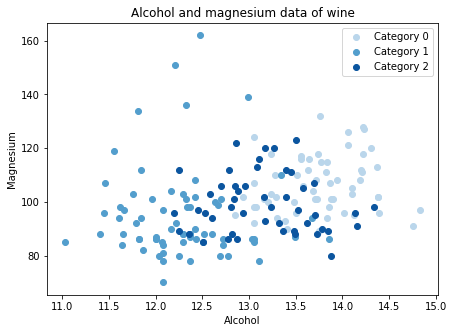

In [65]:
X0, X4 = X[:, 0], X[:, 4]
colors = ['#bad6eb','#539ecd','#0b559f']
fig = plt.figure(figsize=(7,5))
for i, cls in enumerate(np.unique(y)):
    idx = y == cls
    x1 = X0[idx]  # Class-cls of Alcohol
    x2 = X4[idx]  # Class-cls of Magnesium
    # draw scatter
    plt.scatter(x1, x2, c=f'{colors[cls]}', label=f'Category {cls}')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.title('Alcohol and magnesium data of wine')
plt.legend();

4) *(5 Points)* Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [66]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    np.random.seed(1234567)
    # set random index number
    index_random = np.random.choice(np.arange(X.shape[0]),X.shape[0],replace=False)
    # choose the 70% index number as training index and 30% as testing index
    index_train = index_random[:np.int(index_random.__len__()*.7)]
    index_test = index_random[np.int(index_random.__len__()*.7):]
    # split the dataset
    X_train, y_train = X[index_train], y[index_train]
    X_test, y_test = X[index_test], y[index_test]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

5) *(5 Points)* kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [67]:
Xmin = np.min(X_train, axis=0)
Xmax = np.max(X_train, axis=0)
X_train = (X_train - Xmin) / (Xmax - Xmin)
X_test = (X_test - Xmin) / (Xmax - Xmin)

## Task 2: k-nearest neighbors (50 Points)
*Choose classes randomly if weights are equal for multiple classes*

**For B.Sc. Data Science:**  

Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighbors`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `weights`, which is provided as a field in the kNN class.

**For all students other than B.Sc. Data Science:**

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [68]:
# Assistant Function to calculate the k_closest point of P in given pSet
def k_closest_point(P,pSet,k):
    """
    Returns a vector of k_closest_point, a vector of distance and a vector of index
    """
    distance_set = np.array([euclidean_distance(P,x) for x in pSet])
    selected_index_list = np.argsort(distance_set)[:k]
    return pSet[selected_index_list,:], distance_set[selected_index_list], selected_index_list

# Define the classifier
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, training_X, training_y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.training_X = training_X
        self.training_y = training_y
    
    def predict(self, testing_X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        y_pred = np.array([])

        # Calculate the k_closest point of each P in Test set and predict the label
        for P in testing_X:
            _,distance_list,index_list = k_closest_point(P, self.training_X, self.k)
    
            if self.weights == 'uniform':
                labels = self.training_y[index_list]
                counter = np.bincount(labels)
                y_P = np.random.choice(np.flatnonzero(counter == counter.max()))
                
    
            elif self.weights == 'distance':
                if distance_list[0] == 0:
                    y_P = self.training_y[index_list[0]]
                else:
                    weighted_sum = np.zeros((3,1))
                    for i, j in enumerate(index_list):
                        l = self.training_y[j]
                        weighted_sum[l] += 1/distance_list[i]   
                        
                    y_P = weighted_sum.argmax()
                
            else:
                InterruptedError("Please enter the correct type of classifier.")
    
            y_pred = np.append(y_pred,y_P)


        return y_pred

def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

## Task 3: Evaluation (25 Points)

1) *(10 Points)* Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score. It is advisable to implement a function for the confusion matrix and reuse it.

In [69]:
def confusion_matrix(y_pred,y_true):
    conf_matrix = np.zeros((3,3))
    for k in range(len(y_pred)):
        i = int(y_pred[k])
        j = int(y_true[k])
        conf_matrix[i][j] += 1
    return conf_matrix

def recall(y_pred, y_true):
    conf_matrix = confusion_matrix(y_pred,y_true)
    recalls = np.empty((3,1))
    for i in range(3):
        recalls[i] = conf_matrix[i,i]/sum(conf_matrix[:,i])
    return np.mean(recalls)

def precision(y_pred, y_true):
    conf_matrix = confusion_matrix(y_pred,y_true)
    precisions = np.empty((3,1))
    for i in range(3):
        precisions[i] = conf_matrix[i,i]/sum(conf_matrix[i,:])
    return np.mean(precisions)
    
def f1score(y_pred, y_true):
    r = recall(y_pred, y_true)
    p = precision(y_pred, y_true)
    F1 = 2*r*p/(r+p)
    return F1

2) *(10 Points)* Evaluate the performance of kNN with uniform weighting on the Wine dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

**For all students other than B.Sc. Data Science:** 

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

k=1
r,p,F1 for classifier with uniform on train dataset are 1.000000,1.000000,1.000000
r,p,F1 for classifier with distance on train dataset are 1.000000,1.000000,1.000000
r,p,F1 for classifier with uniform on test dataset are 0.969697,0.960784,0.965220
r,p,F1 for classifier with distance on test dataset are 0.969697,0.960784,0.965220
k=5
r,p,F1 for classifier with uniform on train dataset are 0.979592,0.975084,0.977333
r,p,F1 for classifier with distance on train dataset are 1.000000,1.000000,1.000000
r,p,F1 for classifier with uniform on test dataset are 0.969697,0.960784,0.965220
r,p,F1 for classifier with distance on test dataset are 0.969697,0.960784,0.965220
k=9
r,p,F1 for classifier with uniform on train dataset are 0.979592,0.975084,0.977333
r,p,F1 for classifier with distance on train dataset are 1.000000,1.000000,1.000000
r,p,F1 for classifier with uniform on test dataset are 0.984848,0.980392,0.982615
r,p,F1 for classifier with distance on test dataset are 0.984848,0.980392,0

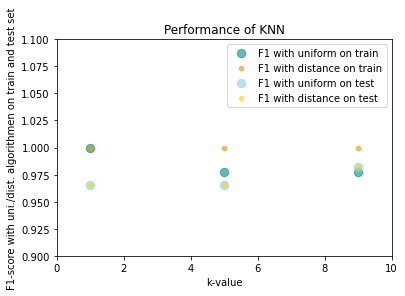

In [70]:
kSet = [1,5,9]
l = len(kSet)
F1_on_train_uni  = np.zeros((l,1))
F1_on_train_dist = np.zeros((l,1))
F1_on_test_uni   = np.zeros((l,1))
F1_on_test_dist  = np.zeros((l,1))
for i in range(l):
    k = kSet[i]
    # Set classifier
    classifier_1 = KNearestNeighbors(k,'uniform')
    classifier_2 = KNearestNeighbors(k,'distance')

    classifier_1.fit(X_train, y_train)
    classifier_2.fit(X_train, y_train)
    # Use classifier to predict the label of train dataset and test dataset
    y_pred_train1 = classifier_1.predict(X_train)
    y_pred_train2 = classifier_2.predict(X_train)

    y_pred_test1  = classifier_1.predict(X_test)
    y_pred_test2  = classifier_2.predict(X_test)
    # Evaluate the results on both train dataset and test dataset
    recall_on_train1    = recall(y_pred_train1, y_train)
    precision_on_train1 = precision(y_pred_train1, y_train)
    f1score_on_train1   = f1score(y_pred_train1, y_train)
    F1_on_train_uni[i]  = f1score_on_train1

    recall_on_train2    = recall(y_pred_train2, y_train)
    precision_on_train2 = precision(y_pred_train2, y_train)
    f1score_on_train2   = f1score(y_pred_train2, y_train)
    F1_on_train_dist[i] = f1score_on_train2

    recall_on_test1     = recall(y_pred_test1,  y_test)
    precision_on_test1  = precision(y_pred_test1,  y_test)
    f1score_on_test1    = f1score(y_pred_test1,  y_test)
    F1_on_test_uni[i]   = f1score_on_test1

    recall_on_test2     = recall(y_pred_test2,  y_test)
    precision_on_test2  = precision(y_pred_test2,  y_test)
    f1score_on_test2    = f1score(y_pred_test2,  y_test)
    F1_on_test_dist[i]  = f1score_on_test2

    print("k={}".format(k))
    print("r,p,F1 for classifier with uniform on train dataset are {:5f},{:5f},{:5f}".format(recall_on_train1,precision_on_train1,f1score_on_train1))
    print("r,p,F1 for classifier with distance on train dataset are {:5f},{:5f},{:5f}".format(recall_on_train2,precision_on_train2,f1score_on_train2))
    print("r,p,F1 for classifier with uniform on test dataset are {:5f},{:5f},{:5f}".format(recall_on_test1,precision_on_test1,f1score_on_test1))
    print("r,p,F1 for classifier with distance on test dataset are {:5f},{:5f},{:5f}".format(recall_on_test2,precision_on_test2,f1score_on_test2))

# Creat plot
fig, ax = plt.subplots()

ax.scatter(kSet, F1_on_train_uni, alpha = 0.6, c="darkcyan", s=70, label = "F1 with uniform on train")
ax.scatter(kSet, F1_on_train_dist,alpha = 0.6, c="darkorange",   s=20, label = "F1 with distance on train")
ax.scatter(kSet, F1_on_test_uni,  alpha = 0.6, c="lightskyblue",  s=70, label = "F1 with uniform on test")
ax.scatter(kSet, F1_on_test_dist, alpha = 0.6, c="gold",s=20, label = "F1 with distance on test")

# Adjust the side information
ax.set_ylim([0.9,1.1])
ax.set_xlim([0,10])
plt.legend()
plt.title('Performance of KNN')
plt.xlabel('k-value')
plt.ylabel('F1-score with uni./dist. algorithmen on train and test set')
plt.show();

From the figure, we can get:
- When k = 1, the F1-score value of training set either with uniform-weight or with distance-weight is the same and is best. And the F1-score value of testing set either with uniform-weight or with distance-weight is the same. The performance of training set is better than testing set.
- When k = 5, the F1-score value of training set with uniform-weight is less than F1 value with distance-weight. And the F1-score value of testing set either with uniform-weight or with distance-weight is the same. The performance of training set with distance-weight is changed when k changes 1 to 5, whereas the testing set not changed.
- When k = 9, the F1-score values of training set with both weights are the same as the value in k = 5. And the F1-score value of testing set either with uniform-weight or with distance-weight is also the same, but this time the F1 value is larger than the first 2 cases. The performance of training set is not changed when k changes 5 to 9, whereas the testing set changed and is better.

3) *(5 Points)* Explain why kNN with `k=1` achieves perfect results on the training data. Why is it not the best model?

- Cause when we use KNN with k=1 on the training data, it will always find itself as the 1-nearest neighbor and the prediction is exactly the label of itself. 
But since we never have the same testing dataset and training dataset(otherwise the whole process is meaningless), and in fact, the testing dataset and training dataset hardly overlap in the reality, it is almost impossible to find exactly the same data point in the test dataset, which means this model doesn't work anymore.